# Hotel Business Sentiment Prediction Analysis


# Problem statement:

>> Currently customers are visiting our hotel and started dropping their reviews about the hotel and We have collected all the reviews.In this model basically we need to identify if the reviews are positive or negative.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import gensim
# downloading the list of stopword
from gensim.parsing.preprocessing import STOPWORDS
import string
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the train and test data
df_train=pd.read_csv('Project_1_train.csv')
df_test=pd.read_csv('Project_1_test.csv')

In [3]:
# Showing training dataset
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
# Showing test dataset
df_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


## Understanding Data:

>> **Features:**           
>>1) User_ID: This feature contains the unique id for each customer visiting the restaurant.          
>>2) Description: This feature contains the feedback customers are giving on the basis of the services provided to them.     
>>3) Browser_Used: This feature contains data about what browser customers are using to give their feedback.    
>>4) Device_Used: This feature contains information about what device customers are using.     

>> **Label:**       
>>Is_Response: Overall response about how a customer is thinking about the restaurant.(i.e 'happy' or 'not happy')      

In [5]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df_train.columns)
shape=df_train.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df_train.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df_train.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df_train.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df_train.columns.values:
    print("Number of unique values of {} : {}".format(col, df_train[col].nunique()))


Features Present in the Dataset: 
 Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

Total Number of Rows :  38932
Total Number of Features :  5


Data Types of Features :
 User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

Dataset contains any NaN/Empty cells :  False

Total number of empty rows in each feature:
 User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64 


Total number of unique values in each feature:
Number of unique values of User_ID : 38932
Number of unique values of Description : 38912
Number of unique values of Browser_Used : 11
Number of unique values of Device_Used : 3
Number of unique values of Is_Response : 2


## Data Preprocessing:

In [6]:
# Here I have made a function in which all the Data cleaning steps like removing punctuations, converting all the documents 
#        into lowercase, using lemmatization and stemming technique, filtering documents using Stopwords, 
#     all these type of data preprocessin steps are being perormed with th ehelp of the function defined below.

stemmer = SnowballStemmer("english")

def Processed_data(feedbacks):
    feedback_corpus = []
    for i in range(0, len(feedbacks)):
  
    # getting only words(i.e removing all the special characters)
        review = re.sub(r'\W', ' ', feedbacks[i])
    
    # getting rid of unwanted characters(i.e remove all the single characters left)
        review=re.sub(r'\s+[a-zA-Z]\s+', ' ', review)
    
    # Removing extra whitespaces
        review=re.sub(r'\s+', ' ', review, flags=re.I)

    #converting all the letters of the review into lowercase
        review = review.lower()

    # splitting every words from the sentences
        review = review.split()
    
    # iterating through each words and checking if they are stopwords or not,
    # if they are stopwords we will not consider them furthermore and if they are not stopwords then, 
    # performing lemmatization operation on that particular word... 
        review = [stemmer.stem(WordNetLemmatizer().lemmatize(word,pos='v')) for word in review if not word in set(STOPWORDS)]

    # joining the review again
        review = ' '.join(review)
        #print(review)
        feedback_corpus.append(review)
        #print(feedback_corpus)
    return feedback_corpus

In [7]:
# Inserting the processed training data into the dataframe    
df_train['Description_clean']=Processed_data(df_train['Description'])

In [8]:
# DataFrame after all the preprocessing steps like, removing punctuations,converting into lower case,
# Lematization and filtered using stopwords 
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_clean
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,room kind clean strong smell dog general avera...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,stay crown plaza april april staff friend atte...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,book hotel hotwir lowest price get desk manag ...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stay husband son way alaska cruis love hotel g...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,girlfriend stay celebr th birthday plan weeken...


In [9]:
# Inserting the processed test data into the dataframe 
df_test['Description_clean']=Processed_data(df_test['Description'])

In [10]:
# DataFrame after all the preprocessing steps like, removing punctuations,converting into lower case,
# Lemaatization and filtered using stopwords 
df_test.head()

,User_ID,Description,Browser_Used,Device_Used,Description_clean
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,look motel close proxim tv tap dr phil choos d...
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop,walk distanc madison squar garden penn subway ...
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,visit seattl busi spend night vintag park grea...
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,hotel locat excel room clean suit bedroom apar...
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,hotel awesom love servic anthoni great guy des...


# EDA (Exploratory Data Analysis)

**Although our prediction does not depends on what kind of device and browser a person use in order to predict the sentiment,I have just use these features in order to show the popularity of a browser and device among these persons.**

In [11]:
# counts representing popularity of search browser among different people.
print("Number of persons using different browsers:\n",df_train['Browser_Used'].value_counts())

Number of persons using different browsers:
 Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64


In [12]:
# counts representing popularity of Device among different people.
print("Number of persons using different Devices:\n",df_train['Device_Used'].value_counts())

Number of persons using different Devices:
 Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64


In [13]:
# counts representing number of persons who are happy or Unhappy.
print("Number of counts of persons Who are either happy or unhappy:\n",df_train['Is_Response'].value_counts())

Number of counts of persons Who are either happy or unhappy:
 happy        26521
not happy    12411
Name: Is_Response, dtype: int64


 ***************************************** Graph showing Browser popularity********************************


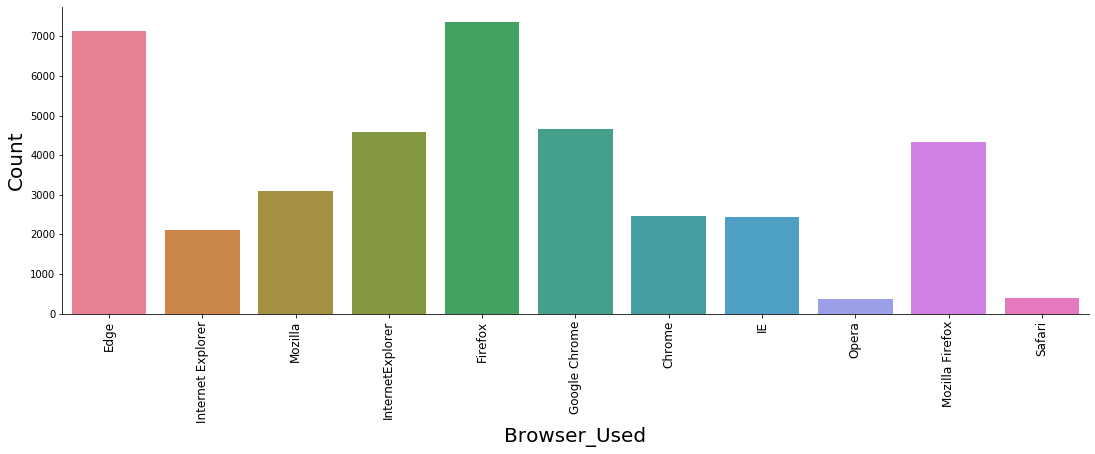

 ****************************************** Graph showing Device popularity*********************************


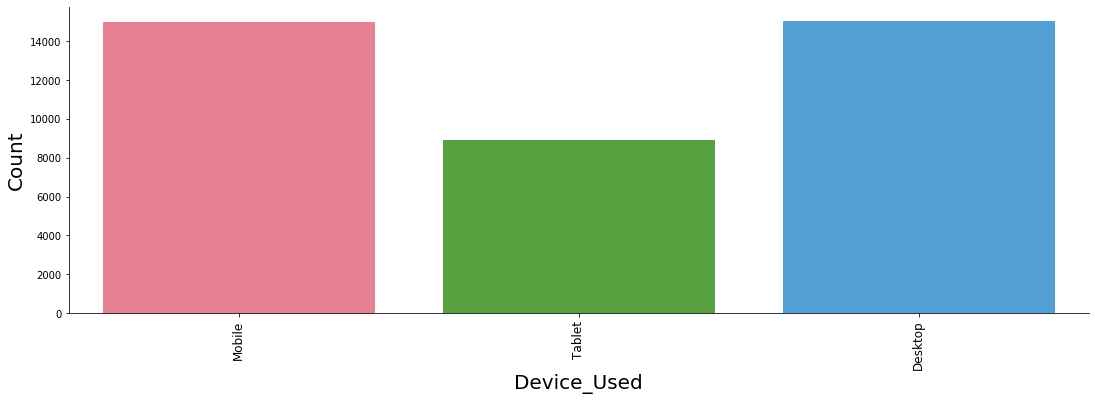

 *********************************************People sentiment counts*****************************************


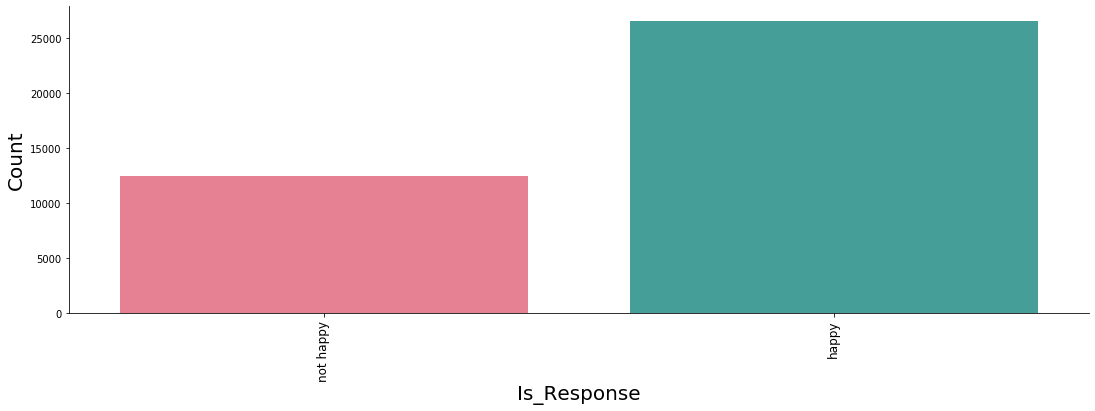

In [14]:
# For loop to plot the graphs of different features with respect to the number of count of each unique instance...
for j,i in enumerate(df_train[df_train.columns[2:5]]):
    if j==0:
        print(" ***************************************** Graph showing Browser popularity********************************")
    if j==1:
        print(" ****************************************** Graph showing Device popularity*********************************")
    if j==2:
        print(" *********************************************People sentiment counts*****************************************")
    sns.catplot(x=i,
                data=df_train,
                kind='count',
                height=5,
                aspect=3,
                palette='husl',
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.show()

In [15]:
# Making a wordcloud function in order to show the happy and unhappy words from the dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'white',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='g')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} words")
    plt.show()

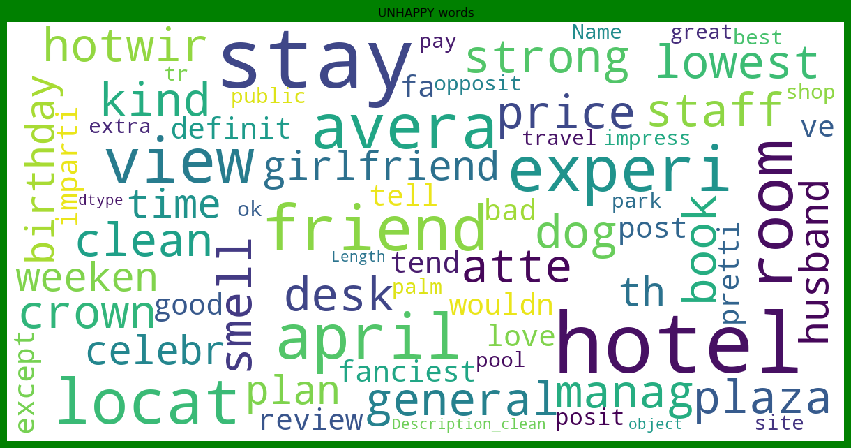

In [16]:
# Unhappy words in training data
Display_wordcloud(df_train['Description_clean'][df_train["Is_Response"]=="not happy"],"UNHAPPY")

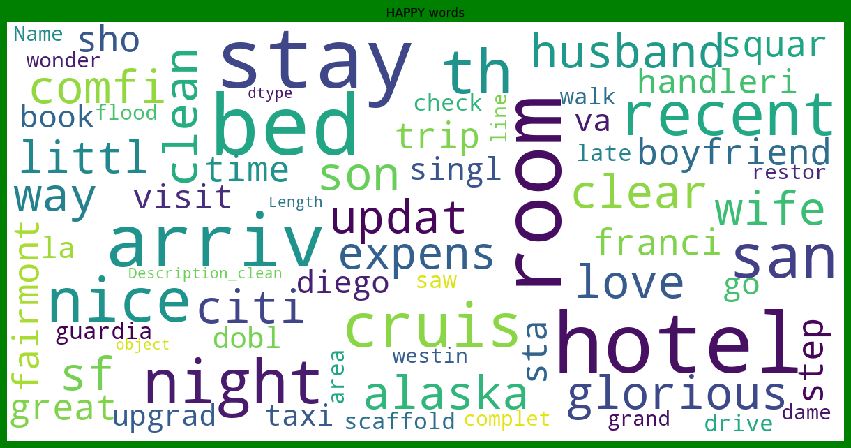

In [17]:
# happy words in training data
Display_wordcloud(df_train['Description_clean'][df_train["Is_Response"]=="happy"],"HAPPY")

In [18]:
# Dropping columns from which not much information is gained in order to predict the sentiments...
df_train.drop(columns=['Description','User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [19]:
#  Mapping "happy" to 1 and "not happy" to 0
df_train["Is_Response"] = df_train["Is_Response"].map({"happy": 1, "not happy" : 0})

In [20]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the train documents into vectors so that machine can do further processing
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=3,smooth_idf=False)
    return tfid.fit_transform(text)

In [21]:
# Inserting vectorized values in a variable x, which will be used in training the model 
x=Tf_idf_train(df_train['Description_clean'])

In [22]:
# checking the shape of the data which is inserted in x which will be used for model training.
print("Shape of x: ",x.shape)

# Assigning the label in y and checking it's shape
y = df_train['Is_Response'].values
print("Shape of y: ",y.shape)

Shape of x:  (38932, 12623)
Shape of y:  (38932,)


# Model Training

In [23]:
# Importing useful libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Ensemble Techniques...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
#........Defining Instances For Differnt Models.......
# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances for different Classifiers
GBC=GradientBoostingClassifier()
RF=RandomForestClassifier()
LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()

In [24]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('DecisionTreeClassifier',DT))
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))


In [25]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** GradientBoostingClassifier *****************************


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Max Accuracy Score corresponding to Random State  80 is: 0.8366438356164384


Learning Score :  0.8456260091002495
Accuracy Score :  0.8366438356164384
Cross Val Score :  0.8960641932987985
roc auc score :  0.7679093756391584


Classif

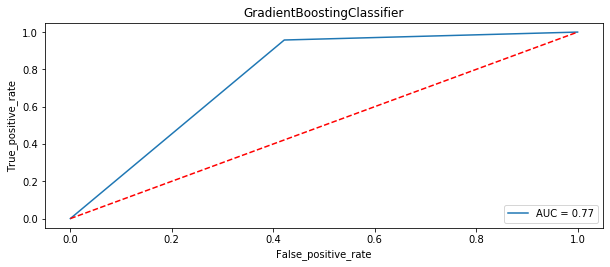

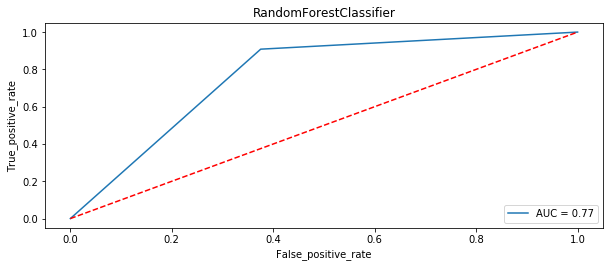

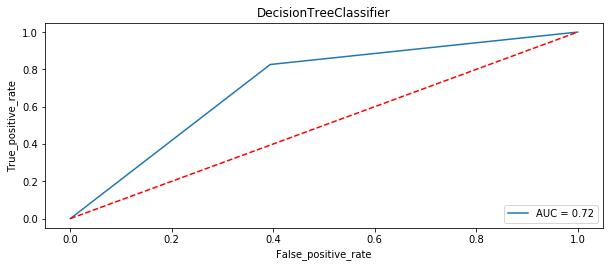

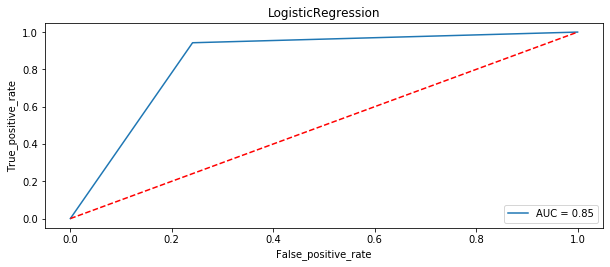

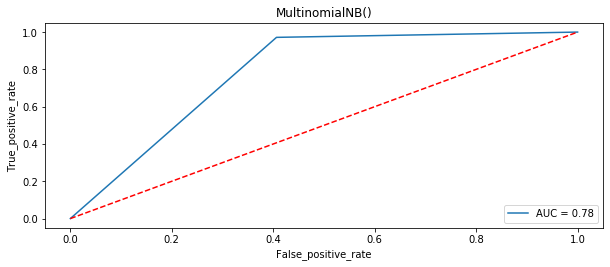

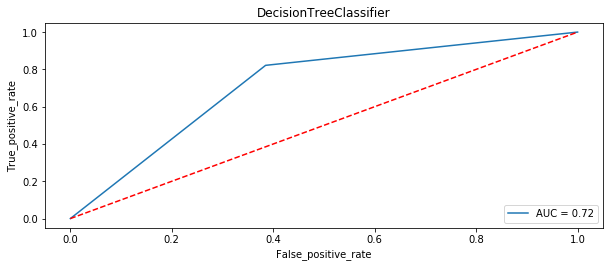

In [26]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [27]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,GradientBoostingClassifier,84.5626,83.6644,89.6064,76.7909
1,RandomForestClassifier,99.5487,81.7979,86.3162,76.6574
2,DecisionTreeClassifier,99.9853,75.5993,70.887,71.6077
3,LogisticRegression,90.1438,88.4247,93.888,85.0941
4,MultinomialNB(),85.535,85.1199,92.0992,78.2665
5,DecisionTreeClassifier,99.989,75.5822,70.4684,71.8381


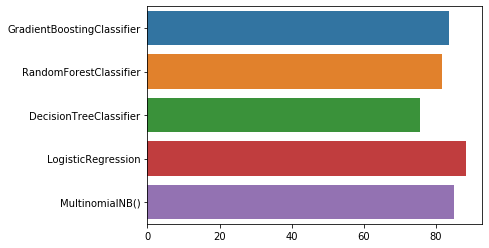

In [28]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

## Using GridSearch CV

**As we can see that both Multinomial nb and Logistic Regression are performing well thus I will use Gridsearch cv on both of these models**

In [29]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [30]:
#.........Grid Search for LogisticRegression......
import numpy as np
lg=LogisticRegression()
parameters={"solver": ["liblinear"],'penalty' : ['l1', 'l2']}
grid_cv(lg,parameters,'f1')

{'penalty': 'l2', 'solver': 'liblinear'}


In [31]:
# checking accuracy score(using max_acc_score function defined earlier) using best parameters which calculated from gridsearchCV
clf_lg = LogisticRegression( solver='liblinear',penalty= 'l2')
max_acc_score(clf_lg,x,y)

Max Accuracy Score corresponding to Random State  51 is: 0.8842465753424658




51

In [32]:
#.........Grid Search for MultinomialNB......
mnb=MultinomialNB()
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid_cv(mnb,parameters,'f1')

{'alpha': 0.1}


In [33]:
# checking accuracy score(using max_acc_score function defined earlier) using best parameters which calculated from gridsearchCV
clf_mnb = MultinomialNB(alpha=0.1)
max_acc_score(clf_mnb,x,y)

Max Accuracy Score corresponding to Random State  51 is: 0.8644691780821918




51

## Training model again with best parameters

In [37]:
# Here I am making prediction using MultinomialNB regression as this model is performing well 
#  in terms of accuracy,roc_auc score...
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 51,test_size=0.20,stratify=y)
lg = LogisticRegression( solver='liblinear',penalty= 'l2')
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
lgpred=lg.predict(x_test)
cv_score_lg=cross_val_score(lg,x,y,cv=10,scoring='roc_auc').mean()
print('Accuracy Score:',accuracy_score(y_test,lgpred))
print('Cross Val Score : ', cv_score_lg)
print('Confusion Matrix:\n',confusion_matrix(y_test,lgpred))
print('Classification Report:','\n',classification_report(y_test,lgpred))

Accuracy Score: 0.8828817259535122
Cross Val Score :  0.9388796328249805
Confusion Matrix:
 [[1896  586]
 [ 326 4979]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      2482
           1       0.89      0.94      0.92      5305

    accuracy                           0.88      7787
   macro avg       0.87      0.85      0.86      7787
weighted avg       0.88      0.88      0.88      7787



In [38]:
# Here I am making prediction using Logistic regression as this model is performing well in terms of accuracy, roc_auc score...
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 51,test_size=0.20,stratify=y)
mnb = MultinomialNB(alpha=0.1)
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
mnbpred=mnb.predict(x_test)
cv_score_mnb=cross_val_score(mnb,x,y,cv=10,scoring='roc_auc').mean()
print('Accuracy Score:',accuracy_score(y_test,mnbpred))
print('Cross Val Score : ', cv_score_mnb)
print('Confusion Matrix:\n',confusion_matrix(y_test,mnbpred))
print('Classification Report:','\n',classification_report(y_test,mnbpred))

Accuracy Score: 0.8641325285732632
Cross Val Score :  0.9197272528039131
Confusion Matrix:
 [[1682  800]
 [ 258 5047]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      2482
           1       0.86      0.95      0.91      5305

    accuracy                           0.86      7787
   macro avg       0.87      0.81      0.83      7787
weighted avg       0.86      0.86      0.86      7787



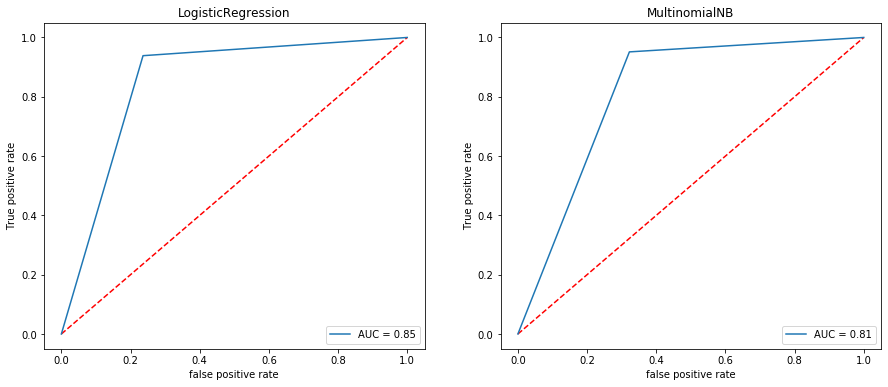

In [53]:
# Roc-Auc score
f,ax = plt.subplots(1,2,figsize = (15,6))
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lgpred)
ax[0].plot([0,1],[0,1],'r--')
ax[0].plot(fpr,tpr,label='AUC = %0.2f'% roc_auc_score(y_test, lgpred))
ax[0].legend(loc='lower right')
ax[0].set_xlabel('false positive rate')
ax[0].set_ylabel('True positive rate')
ax[0].set_title('LogisticRegression')

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, mnbpred)
ax[1].plot([0,1],[0,1],'r--')
ax[1].plot(fpr,tpr,label='AUC = %0.2f'% roc_auc_score(y_test, mnbpred))
ax[1].legend(loc='lower right')
ax[1].set_xlabel('false positive rate')
ax[1].set_ylabel('True positive rate')
ax[1].set_title('MultinomialNB')

plt.show()



## After all this process conclusion is that LogisticRegression performing well because of high roc_auc score, better accuracy, better cv score...

In [54]:
# lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(lg,'Project1_hotel_Sentinal_prediction.pkl')

['Project1_hotel_Sentinal_prediction.pkl']

In [55]:
#read the file using joblib
lg_from_joblib=joblib.load('Project1_hotel_Sentinal_prediction.pkl')
joblib_y_preds = lg_from_joblib.predict(x_test)
joblib_y_preds

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

# Testing Model:

**Now we know that our model is performing well using Logistic regression thus I need to do all the Data cleaning and preprocessing steps in order to use our model to predict the People sentiments for the test data**

In [56]:
df_test

,User_ID,Description,Browser_Used,Device_Used,Description_clean
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,look motel close proxim tv tap dr phil choos d...
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop,walk distanc madison squar garden penn subway ...
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,visit seattl busi spend night vintag park grea...
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,hotel locat excel room clean suit bedroom apar...
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,hotel awesom love servic anthoni great guy des...
...,...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Chrome,Mobile,stay hotel tower confer love place room spacio...
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet,tri stay marriott famili want pay park resid i...
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop,stay night littl dog friend staff ask time com...
29402,id109534,Stayed at the Yotel over the weekend and was v...,InternetExplorer,Desktop,stay yotel weekend impress thing like best sof...


**I have already cleaned the test data earlier and the cleaned results are in Description_clean feature**

In [57]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the testdocuments into vectors so that machine can do further processing
# So In order to do prediction, the features of the test data should be equal to the features we used to train our model thus
#    I have defined the max_features equal to that obtained from training data(i.e 12623)
def Tf_idf_test(text):
    tfid = TfidfVectorizer(max_features=12623,smooth_idf=False)
    return tfid.fit_transform(text)

In [58]:
# lets predict our test dataset; Loading our to be predicted data into x...
x=Tf_idf_test(df_test['Description_clean'])
y_pred=lg.predict(x)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [59]:
# replacing the testing values with their original meaning(i.e "happy" with "0" and "not happy" with "1")...
a=[]
for i in y_pred:
    if i==1:
        a.append("happy")
    elif i==0:
        a.append("not happy")

In [60]:
# Assigning the predicted value in the dataframe 
df_test['Predicted value']=a
df_test

,User_ID,Description,Browser_Used,Device_Used,Description_clean,Predicted value
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,look motel close proxim tv tap dr phil choos d...,happy
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop,walk distanc madison squar garden penn subway ...,happy
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,visit seattl busi spend night vintag park grea...,happy
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,hotel locat excel room clean suit bedroom apar...,not happy
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,hotel awesom love servic anthoni great guy des...,happy
...,...,...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Chrome,Mobile,stay hotel tower confer love place room spacio...,not happy
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet,tri stay marriott famili want pay park resid i...,happy
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop,stay night littl dog friend staff ask time com...,happy
29402,id109534,Stayed at the Yotel over the weekend and was v...,InternetExplorer,Desktop,stay yotel weekend impress thing like best sof...,happy


### Displaying words using wordcloud

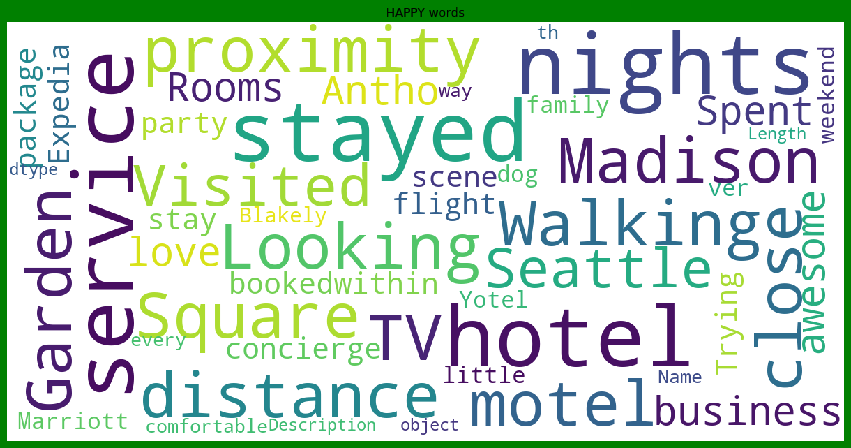

In [63]:
# Happy words in training data
Display_wordcloud(df_test['Description'][df_test["Predicted value"]=="happy"],"HAPPY")

In [64]:
# Displaying number of counts for both sentiments..
df_test['Predicted value'].value_counts()

happy        21387
not happy     8017
Name: Predicted value, dtype: int64

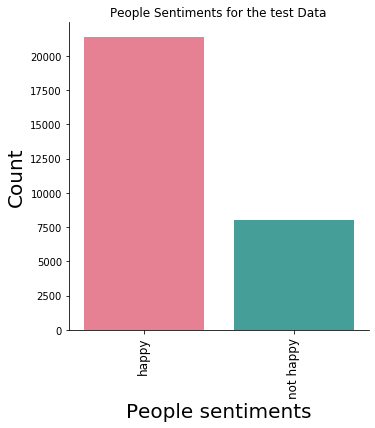

In [65]:
# Displaying People sentiments using catplot
sns.catplot(x='Predicted value',
                data=df_test,
                kind='count',
                palette='husl',
               )
plt.xticks(rotation=90,fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=20)
plt.xlabel('People sentiments',fontsize=20)
plt.title("People Sentiments for the test Data")
plt.show()

In [66]:
# Saving the Predicted values in csv file
df1=pd.DataFrame()
df1['Description']=df_test['Description']
df1['Predicted_Sentiments']=df_test['Predicted value']
df1.to_csv('Project1_hotel_Sentinal_prediction.csv')

# Conclusion : 
>>1) Logistic Regression is providing better f1 score,accuracy ,precision,recall and auc_roc score as compared to other models. 
>>2) Positive feedbacks are more as compared to the negative ones.  
>>3) Thus being the hotel owner we need to improve the facilities and services in a way that these negative feedbacks will be reduced to 0.              